Completed By Paulina Czarnota C21365726

Due Date: 15/12/2024

The code closely follows Nielsen's implementation. Each activation is treated as a column vector, including the output layer, even when the XOR output is a single value. For instance, if the activation value of the output neuron is a, it is represented as np.array([[a]]), maintaining consistency in matrix operations.

The code is easily adaptable for the MLP exercises and the Iris classification problem. However, to solve more complex problems, you may need to use more than two hidden neurons and more than one output neuron.

In [1]:
import numpy as np  # Core library for numerical computations and matrix operations
import pandas as pd  # Data manipulation and CSV file handling
from sklearn.model_selection import train_test_split  # Splitting datasets into training and testing sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder  # Data preprocessing tools
from sklearn.metrics import confusion_matrix, accuracy_score  # Evaluation metrics for model performance
import matplotlib.pyplot as plt  # Visualization library for plotting graphs and charts

In [2]:
# Define activation functions and their derivatives
def sigmoid(z):
    """Sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
    """Derivative of the sigmoid activation function."""
    a = sigmoid(z)
    return a * (1 - a)

In [3]:
# XOR-Specific MLP Class
class XOR_MLP:
    def __init__(self):
        """
        Initialize XOR MLP with fixed weights and biases for XOR problem.
        """
        # Define XOR training inputs and expected outputs
        self.train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input pairs
        self.train_outputs = np.array([[0], [1], [1], [0]])  # Corresponding XOR outputs

        np.random.seed(23)  # Set seed for reproducibility of random weights and biases

        # Initialize weights and biases for the hidden layer (2 neurons)
        # w2: weights connecting inputs to hidden layer (2x2 matrix)
        # b2: biases for the hidden layer (2x1 vector)
        self.w2 = np.random.randn(2, 2)
        self.b2 = np.random.randn(2, 1)

        # Initialize weights and biases for the output layer (1 neuron)
        # w3: weights connecting hidden layer to output (1x2 matrix)
        # b3: biases for the output layer (1x1 scalar)
        self.w3 = np.random.randn(1, 2)
        self.b3 = np.random.randn(1, 1)

    def feedforward(self, xs):
        """
        Perform feedforward computation.
        Args:
            xs: Input data (2xN matrix, where N is the number of samples)
        Returns:
            a3s: Output of the network (1xN matrix)
        """
        # Compute activations for the hidden layer
        # z2: linear combination of inputs and weights for the hidden layer
        # a2s: activations after applying the sigmoid function
        a2s = sigmoid(self.w2 @ xs + self.b2)

        # Compute activations for the output layer
        # z3: linear combination of hidden layer outputs and weights for the output layer
        # a3s: final output after applying the sigmoid function
        a3s = sigmoid(self.w3 @ a2s + self.b3)

        return a3s

    def backprop(self, xs, ys):
        """
        Perform backpropagation to compute gradients for weights and biases.
        Args:
            xs: Input data (2xN matrix)
            ys: Target outputs (1xN matrix)
        Returns:
            Gradients for weights and biases, along with the computed cost.
        """
        # Initialize gradients and cost
        del_w2 = np.zeros(self.w2.shape, dtype=float)  # Gradient of w2
        del_b2 = np.zeros(self.b2.shape, dtype=float)  # Gradient of b2
        del_w3 = np.zeros(self.w3.shape, dtype=float)  # Gradient of w3
        del_b3 = np.zeros(self.b3.shape, dtype=float)  # Gradient of b3
        cost = 0.0  # Initialize cost accumulator

        # Process each training sample
        for x, y in zip(xs.T, ys.T):
            # Reshape input and target output
            a1 = x.reshape(-1, 1)  # Input vector (column vector)
            z2 = self.w2 @ a1 + self.b2  # Linear combination for hidden layer
            a2 = sigmoid(z2)  # Apply sigmoid to hidden layer activations
            z3 = self.w3 @ a2 + self.b3  # Linear combination for output layer
            a3 = sigmoid(z3)  # Apply sigmoid to output layer activations

            # Compute deltas (errors)
            delta3 = (a3 - y) * sigmoid_derivative(z3)  # Output layer error
            delta2 = sigmoid_derivative(z2) * (self.w3.T @ delta3)  # Hidden layer error

            # Accumulate gradients
            del_b3 += delta3
            del_w3 += delta3 @ a2.T
            del_b2 += delta2
            del_w2 += delta2 @ a1.T

            # Accumulate cost (Mean Squared Error)
            cost += ((a3 - y) ** 2).sum()

        # Normalize gradients by the number of samples
        n_samples = xs.shape[1]
        return del_b2 / n_samples, del_w2 / n_samples, del_b3 / n_samples, del_w3 / n_samples, cost / n_samples

    def train(self, epochs, eta):
        """
        Train the XOR MLP using gradient descent.
        Args:
            epochs: Number of training iterations
            eta: Learning rate for gradient descent
        Returns:
            cost: Array of costs over epochs
        """
        xs = self.train_inputs.T  # Transpose inputs for matrix calculations
        ys = self.train_outputs.T  # Transpose outputs for matrix calculations
        cost = np.zeros(epochs)  # Array to store cost for each epoch

        # Perform training over the specified number of epochs
        for e in range(epochs):
            # Compute gradients and cost
            d_b2, d_w2, d_b3, d_w3, cost[e] = self.backprop(xs, ys)

            # Update weights and biases using gradient descent
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3

        # Plot the cost over epochs
        plt.plot(cost)
        plt.title("Cost Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.show()

        return cost

    def predict(self, x):
        """
        Predict output for a given input.
        Args:
            x: Input data (2xN matrix, where N is the number of samples)
        Returns:
            Predicted output of the network (1xN matrix)
        """
        return self.feedforward(x.T)

Predictions before training: [[0.13441229 0.10816814 0.14522425 0.12453942]]


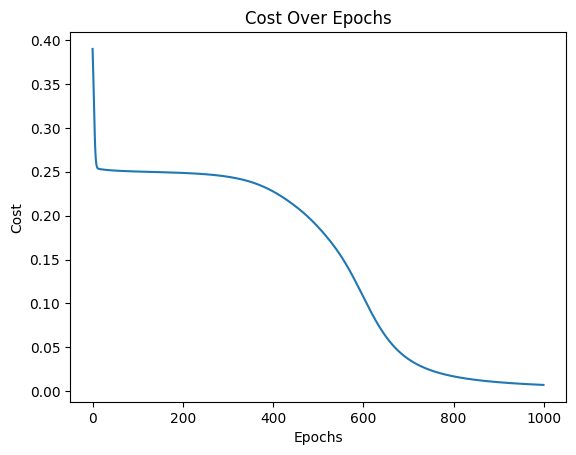

Predictions after training: [[0.08467026 0.91859922 0.91853706 0.08963025]]


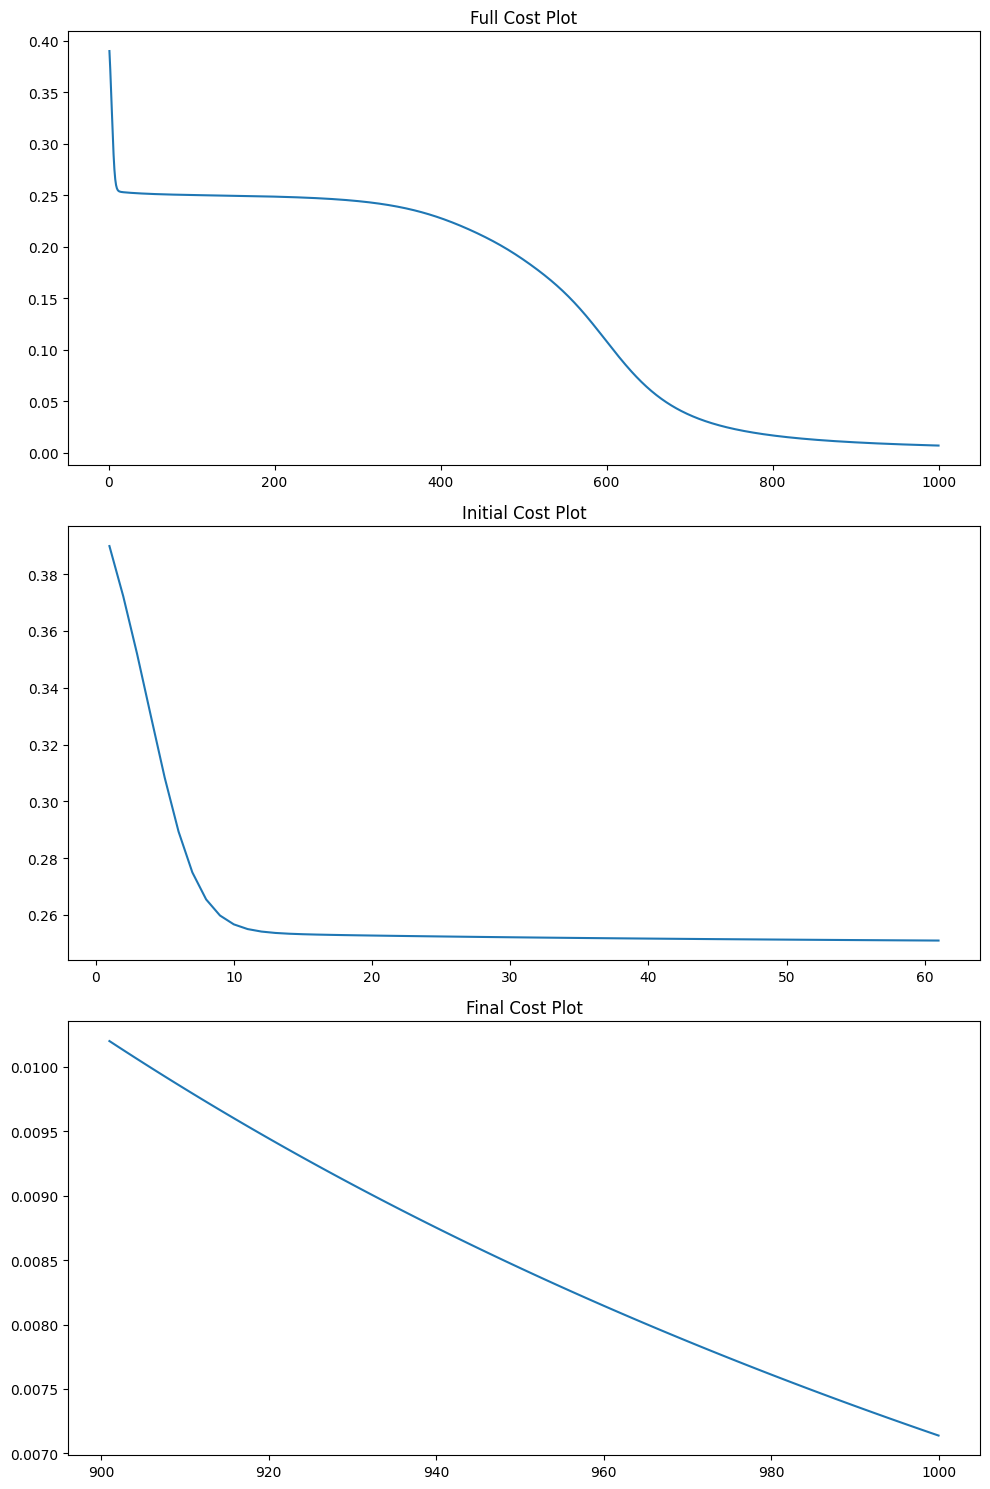

In [4]:
# Create an instance of the XOR_MLP class
xor = XOR_MLP()

# Transpose the training inputs for matrix operations
xs = xor.train_inputs.T

# Display predictions before training
# Feedforward the training inputs through the untrained network to observe initial predictions
print("Predictions before training:", xor.feedforward(xs))

# Set the number of training epochs and learning rate
epochs = 1000  # Number of iterations for training
learning_rate = 3.0  # Learning rate for gradient descent

# Train the MLP model
# This updates the weights and biases based on backpropagation
c = xor.train(epochs, learning_rate)

# Display predictions after training
# Feedforward the training inputs through the trained network to observe final predictions
print("Predictions after training:", xor.feedforward(xs))

# Plot the cost function over epochs to analyze the training progress
x_axis = np.linspace(1, epochs, epochs, dtype=int)  # Epoch numbers for the x-axis

# Create a figure with 3 subplots to display different sections of the cost plot
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the full cost function over all epochs
plt.subplot(3, 1, 1)
plt.plot(x_axis, c)
plt.title("Full Cost Plot")  # Title for the full plot

# Plot the initial section of the cost function to observe early training behavior
plt.subplot(3, 1, 2)
plt.plot(x_axis[:61], c[:61])  # First 60 epochs
plt.title("Initial Cost Plot")  # Title for the initial section

# Plot the final section of the cost function to observe late training behavior
plt.subplot(3, 1, 3)
plt.plot(x_axis[900:], c[900:])  # Last 100 epochs
plt.title("Final Cost Plot")  # Title for the final section

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()

Exercise 1: XOR Problem

Copy and adapt the XOR_MLP code to use 3 neurons in the hidden layer. Train this MLP and analyze whether it learns faster compared to the original implementation.

In [5]:
# Define the Multilayer Perceptron (MLP) class
class MLP:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, loss_function="mse"):
        """
        Initialize the network with weights and biases.
        
        Parameters:
        input_neurons: Number of input features
        hidden_neurons: Number of neurons in the hidden layer
        output_neurons: Number of output neurons (classes)
        loss_function: Loss function to use ("mse" or "cross_entropy")
        """
        np.random.seed(42)  # Set seed for reproducibility
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.loss_function = loss_function

        # Initialize weights and biases with random values
        self.w2 = np.random.randn(hidden_neurons, input_neurons)  # Weights from input to hidden layer
        self.b2 = np.random.randn(hidden_neurons, 1)  # Bias for hidden layer
        self.w3 = np.random.randn(output_neurons, hidden_neurons)  # Weights from hidden to output layer
        self.b3 = np.random.randn(output_neurons, 1)  # Bias for output layer

    def feedforward(self, xs):
        """
        Perform the feedforward operation through the network.
        
        Parameters:
        xs: Input data matrix
        
        Returns:
        Final output activations
        """
        self.a1 = xs  # Inputs to the network
        self.z2 = self.w2 @ self.a1 + self.b2  # Compute hidden layer input
        self.a2 = sigmoid(self.z2)  # Apply activation function to hidden layer
        self.z3 = self.w3 @ self.a2 + self.b3  # Compute output layer input
        self.a3 = sigmoid(self.z3)  # Apply activation function to output layer
        return self.a3

    def compute_loss(self, a3, y):
        """
        Compute the loss based on the selected cost function.
        
        Parameters:
        a3: Predicted outputs
        y: Actual target outputs
        
        Returns:
        Computed loss value
        """
        if self.loss_function == "mse":  # Mean Squared Error
            return ((a3 - y) ** 2).sum() / 2
        elif self.loss_function == "cross_entropy":  # Cross-Entropy Loss
            return -(y * np.log(a3) + (1 - y) * np.log(1 - a3)).sum()

    def backprop(self, xs, ys):
        """
        Perform backpropagation to calculate gradients.
        
        Parameters:
        xs: Input data
        ys: Target output data
        
        Returns:
        Gradients for weights and biases, and the average cost
        """
        del_w2 = np.zeros_like(self.w2)  # Gradient of w2
        del_b2 = np.zeros_like(self.b2)  # Gradient of b2
        del_w3 = np.zeros_like(self.w3)  # Gradient of w3
        del_b3 = np.zeros_like(self.b3)  # Gradient of b3
        cost = 0.0  # Initialize total cost

        for x, y in zip(xs.T, ys.T):  # Loop through each training sample
            x = x.reshape(-1, 1)
            y = y.reshape(-1, 1)
            a3 = self.feedforward(x)

            # Compute output layer error (delta3)
            if self.loss_function == "mse":
                delta3 = (a3 - y) * sigmoid_derivative(self.z3)
            elif self.loss_function == "cross_entropy":
                delta3 = (a3 - y)

            # Compute hidden layer error (delta2)
            delta2 = sigmoid_derivative(self.z2) * (self.w3.T @ delta3)

            # Accumulate gradients
            del_b3 += delta3
            del_w3 += delta3 @ self.a2.T
            del_b2 += delta2
            del_w2 += delta2 @ x.T

            # Accumulate cost
            cost += self.compute_loss(a3, y)

        n_samples = xs.shape[1]  # Normalize by number of samples
        return del_b2 / n_samples, del_w2 / n_samples, del_b3 / n_samples, del_w3 / n_samples, cost / n_samples

    def train(self, train_inputs, train_outputs, epochs, learning_rate):
        """
        Train the network using backpropagation.
        
        Parameters:
        train_inputs: Training input data
        train_outputs: Training output data
        epochs: Number of training iterations
        learning_rate: Learning rate for weight updates
        
        Returns:
        Cost history over epochs
        """
        train_inputs = train_inputs.T
        train_outputs = train_outputs.T
        cost_history = np.zeros(epochs)  # Store cost per epoch

        for epoch in range(epochs):  # Training loop
            d_b2, d_w2, d_b3, d_w3, cost_history[epoch] = self.backprop(train_inputs, train_outputs)
            # Update weights and biases using gradient descent
            self.b2 -= learning_rate * d_b2
            self.w2 -= learning_rate * d_w2
            self.b3 -= learning_rate * d_b3
            self.w3 -= learning_rate * d_w3

        # Plot cost over epochs
        plt.plot(cost_history)
        plt.title("Cost Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.show()
        return cost_history

    def predict(self, inputs):
        """
        Predict outputs for the given inputs.
        
        Parameters:
        inputs: Input data
        
        Returns:
        Predicted output labels
        """
        inputs = inputs.T
        outputs = self.feedforward(inputs)
        return outputs.T

    def evaluate(self, test_inputs, test_outputs):
        """
        Evaluate the model using accuracy and confusion matrix.
        
        Parameters:
        test_inputs: Test input data
        test_outputs: Actual test target labels
        
        Prints:
        Accuracy and confusion matrix
        """
        predictions = self.predict(test_inputs)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(test_outputs, axis=1)
        accuracy = accuracy_score(true_classes, predicted_classes)
        cm = confusion_matrix(true_classes, predicted_classes)
        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", cm)

Question: Are the outputs of these correct?

Answer: Yes, the outputs (W2 and W3 matrices) are correctly initialized with expected shapes.

Reason: For p1, W2 is 4x3 (4 hidden neurons, 3 inputs), and W3 is 2x4 (2 outputs, 4 hidden neurons).
For p2, W2 is 6x4 (6 hidden neurons, 4 inputs), and W3 is 3x6 (3 outputs, 6 hidden neurons).

In [6]:
# Test MLP initialization with different configurations

# Initialize MLP with 3 input neurons, 4 hidden neurons, and 2 output neurons
p1 = MLP(3, 4, 2)
# Print weights and biases for the first configuration
print('\n W2 = \n', p1.w2, '\n W3 = \n', p1.w3, '\n')  

# Initialize MLP with 4 input neurons, 6 hidden neurons, and 3 output neurons
p2 = MLP(4, 6, 3)
# Print weights and biases for the second configuration
print('\n W2 = \n', p2.w2, '\n W3 = \n', p2.w3, '\n')  


 W2 = 
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]] 
 W3 = 
 [[-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]] 


 W2 = 
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]] 
 W3 = 
 [[-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828]
 [-0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223]] 



In [7]:
# Preprocessing Function
def preprocess_dataset(filepath, target_column, is_classification=True):
    """
    Preprocess datasets to extract inputs and outputs.

    Parameters:
    filepath: str - Path to the CSV file
    target_column: str - Name of the target/output column
    is_classification: bool - True for classification, False for regression

    Returns:
    inputs: np.ndarray - Preprocessed input features
    outputs: np.ndarray - Preprocessed target/output values
    """
    df = pd.read_csv(filepath)
    
    # Handle target column
    if is_classification:
        outputs = pd.get_dummies(df[target_column]).to_numpy()  # One-hot encode for classification
    else:
        outputs = df[[target_column]].to_numpy()  # Use directly for regression
    
    # Encode categorical features except the target column
    for col in df.columns:
        if df[col].dtype == "object" and col != target_column:
            df[col] = LabelEncoder().fit_transform(df[col])
    
    inputs = df.drop(columns=[target_column]).to_numpy()
    return inputs.astype(float), outputs.astype(float)

In [8]:
# File paths for datasets
iris_path = r"C:\Users\35389\Desktop\TU856 Modules\YEAR 3\Year 3 - Semester 1\Intro To Artificial Intelligence - Richard Lawlor\CA Assignments\MLP AI Assignment\iris_data.csv"
transport_path = r"C:\Users\35389\Desktop\TU856 Modules\YEAR 3\Year 3 - Semester 1\Intro To Artificial Intelligence - Richard Lawlor\CA Assignments\MLP AI Assignment\transport.csv"
seeds_path = r"C:\Users\35389\Desktop\TU856 Modules\YEAR 3\Year 3 - Semester 1\Intro To Artificial Intelligence - Richard Lawlor\CA Assignments\MLP AI Assignment\seeds.csv"

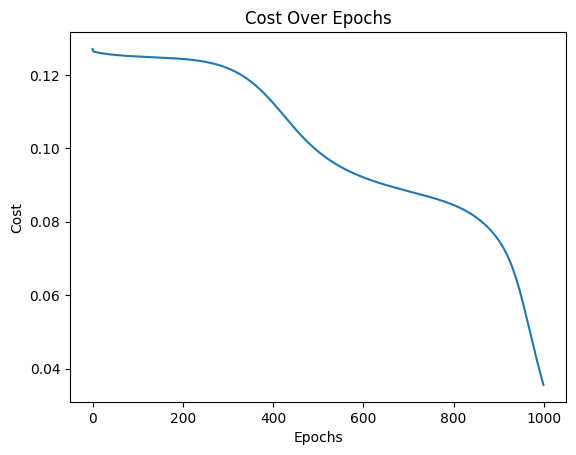

XOR Predictions:
[[0.12576424]
 [0.74489552]
 [0.73444604]
 [0.35976251]]


In [9]:
# XOR Problem: Define input-output pairs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
xor_outputs = np.array([[0], [1], [1], [0]])  # XOR outputs

# Initialize MLP: 2 inputs, 3 hidden neurons, 1 output, MSE loss
xor_mlp = MLP(2, 3, 1, loss_function="mse")

# Train the MLP on the XOR dataset for 1000 epochs
xor_mlp.train(xor_inputs, xor_outputs, epochs=1000, learning_rate=3.0)

# Predict and print outputs after training
print("XOR Predictions:")
print(xor_mlp.predict(xor_inputs))

Exercise 2: Iris Dataset

Train the MLP on the Iris dataset using 4 input neurons (features), 6 hidden neurons, and 3 output neurons (classes).

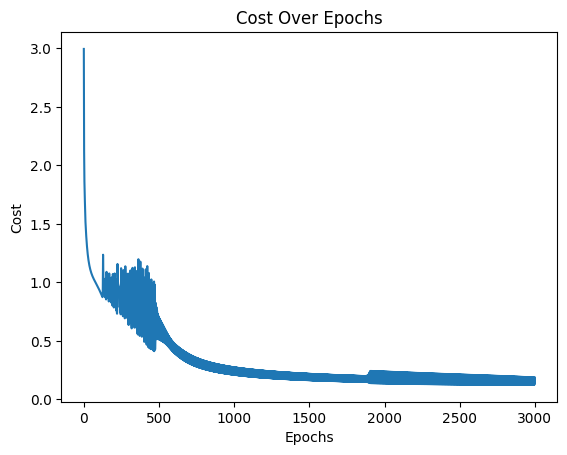

Iris Predictions:
[[9.95078343e-01 7.32694713e-03 2.67350813e-04]
 [9.95186233e-01 7.25873166e-03 2.65530051e-04]
 [9.95043608e-01 7.46925782e-03 2.67254822e-04]
 [9.95224061e-01 7.13889075e-03 2.65593000e-04]
 [9.95181249e-01 7.14602366e-03 2.66518664e-04]]


In [10]:
# Iris Dataset: Load and preprocess the Iris dataset
iris_inputs, iris_outputs = preprocess_dataset(iris_path, 'Iris-setosa', is_classification=True)

# Initialize MLP: 4 inputs (features), 6 hidden neurons, 3 outputs (classes), cross-entropy loss
iris_mlp = MLP(4, 6, 3, loss_function="cross_entropy")

# Train the MLP on the Iris dataset for 3000 epochs with a learning rate of 0.5
iris_mlp.train(iris_inputs, iris_outputs, epochs=3000, learning_rate=0.5)

# Predict and print the first 5 predictions
print("Iris Predictions:")
print(iris_mlp.predict(iris_inputs)[:5])

Exercise 3: Transport Dataset

Train the MLP to predict transportation mode (bus, car, train) using 4 attributes (gender, car ownership, travel cost, income level).

In [ ]:
# Transport Dataset: Load and preprocess the transport dataset
transport_inputs, transport_outputs = preprocess_dataset(transport_path, 'transportation_mode', is_classification=True)

# Initialize MLP: 4 inputs (features), 6 hidden neurons, outputs based on dataset classes, cross-entropy loss
transport_mlp = MLP(4, 6, transport_outputs.shape[1], loss_function="cross_entropy")

# Train the MLP on the transport dataset for 3000 epochs with a learning rate of 0.5
transport_mlp.train(transport_inputs, transport_outputs, epochs=3000, learning_rate=0.5)

# Predict and print the first 5 predictions
print("Transport Predictions:")
print(transport_mlp.predict(transport_inputs)[:5])

Exercise 4: Seeds Dataset

Train the MLP on the Seeds dataset to classify seed types with an adaptable architecture.

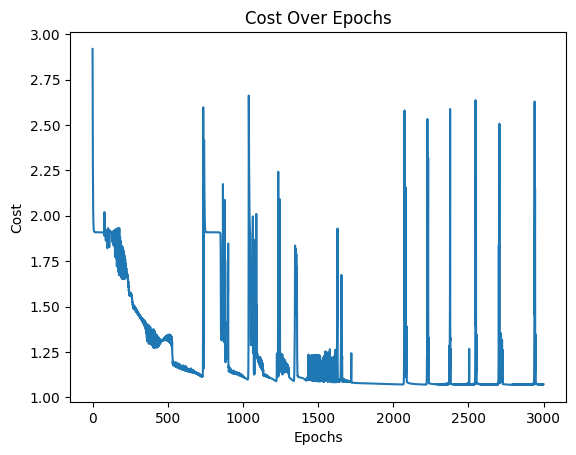

Seeds Predictions:
[[0.47641683 0.51957209 0.01868213]
 [0.47641536 0.51957272 0.01868226]
 [0.47641697 0.51957196 0.01868212]
 [0.47641588 0.51957159 0.01868224]
 [0.47641695 0.51957204 0.01868211]]


In [24]:
# Seeds Dataset: Load and preprocess the seeds dataset
seeds_inputs, seeds_outputs = preprocess_dataset(seeds_path, 'Type', is_classification=True)

# Initialize MLP: Inputs and outputs based on dataset dimensions, 6 hidden neurons, cross-entropy loss
seeds_mlp = MLP(seeds_inputs.shape[1], 6, seeds_outputs.shape[1], loss_function="cross_entropy")

# Train the MLP on the seeds dataset for 3000 epochs with a learning rate of 0.5
seeds_mlp.train(seeds_inputs, seeds_outputs, epochs=3000, learning_rate=0.5)

# Predict and print the first 5 predictions
print("Seeds Predictions:")
print(seeds_mlp.predict(seeds_inputs)[:5])